In [33]:
import pickle
import warnings
from pprint import pprint

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split

import shap

X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

# create a train/test split
random_state = 7
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True,
    "random_state": random_state,
}

model = lgb.train(
    params,
    d_train,
    10000,
    valid_sets=[d_test],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(50)]
)

Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_logloss: 0.322229
[100]	valid_0's binary_logloss: 0.297407
[150]	valid_0's binary_logloss: 0.288419
[200]	valid_0's binary_logloss: 0.284763
[250]	valid_0's binary_logloss: 0.282542
[300]	valid_0's binary_logloss: 0.28083
[350]	valid_0's binary_logloss: 0.280014
[400]	valid_0's binary_logloss: 0.279539
[450]	valid_0's binary_logloss: 0.279087
[500]	valid_0's binary_logloss: 0.278594
[550]	valid_0's binary_logloss: 0.278311
[600]	valid_0's binary_logloss: 0.278211
[650]	valid_0's binary_logloss: 0.278132
Early stopping, best iteration is:
[644]	valid_0's binary_logloss: 0.278029


In [34]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = X_test.iloc[select]
features_display = X_display.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Explainer expected value: [-2.43266725]


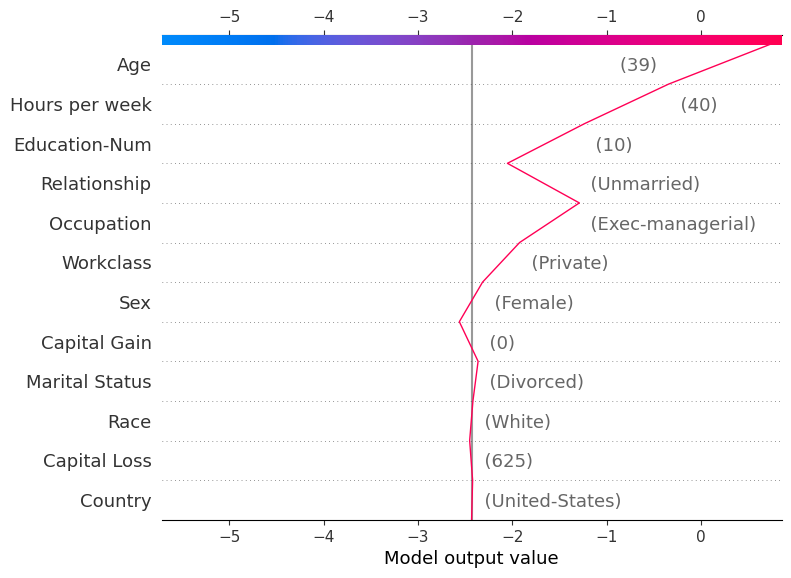

In [35]:
shap.decision_plot(expected_value, shap_values, features_display)

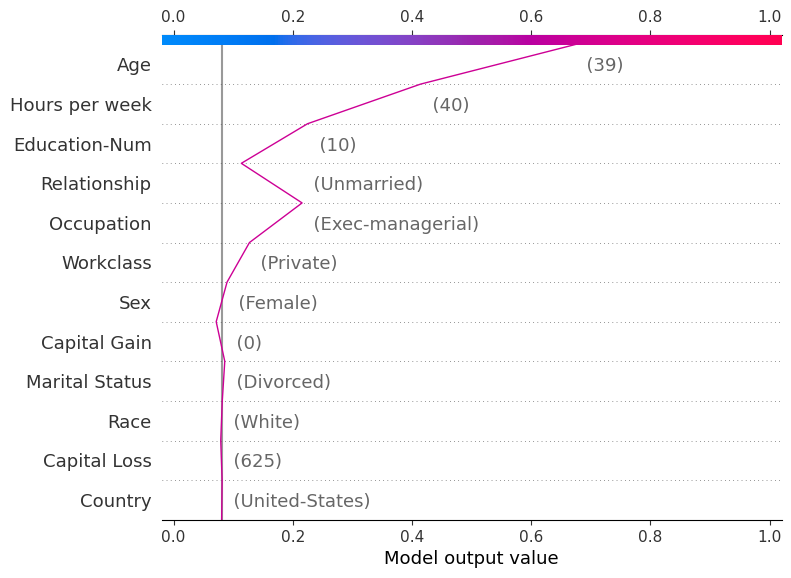

In [36]:
shap.decision_plot(expected_value, shap_values, features_display, link="logit")

In [37]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 